## Salary Prediction System

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score #Importing the r2_score function from the sklearn.metrics module for finding r^2



In [2]:

def welcome():
    print("Welcome to salary prediction system")
    print("Press ENTER KEY to proceed")
    input()

In [3]:
def checkcsv():
    csv_files = []# Initializing list to hold CSV files
    cur_dir = os.getcwd()# Getting current working directory
    content_list = os.listdir(cur_dir)
    for x in content_list:
        if x.split(".")[-1] == 'csv':
            csv_files.append(x)
        
    if len(csv_files) == 0:
        return "No CSV files in the directory"
    else:
        return csv_files


In [4]:
def display_and_select_csv (csv_files):
    # Displaying each CSV file with an index number
    i = 0
    for file_name in csv_files:
        print(i,"...", file_name)
        i +=1
    return csv_files[int(input("select file to create ML Model" ))]# Printing instruction for the user to select a file and return the selected file name

#creating function 
def graph(X_train, Y_train, regressionObject, X_test, Y_test, Y_pred):#Function to plot the training and test data, along with the regression line
    plt.scatter(X_train, Y_train, color = "red", label= "training data")# Ploting training data points
    plt.plot(X_train, regressionObject.predict(X_train), color = "blue", label = "Best fit")# Ploting the regression line
    plt.scatter(X_test, Y_test, color = "green", label = "test data")# Ploting test data points
    plt.scatter(X_test, Y_pred, color = "black", label = "Pred test data")#Ploting predicted test data points
    plt.title("Salary vs Experience")## Seting graph title 
    plt.xlabel("Years of Experience")#Seting graph label for x axis 
    plt.ylabel("Salary")#Seting graph label for y axis 
    plt.legend()# show legend
    plt.show()# display the graph

Welcome to salary prediction system
Press ENTER KEY to proceed

0 ... attachment_Salary-Data_lyst5512 (1).csv
select file to create ML Model0
attachment_Salary-Data_lyst5512 (1).csv is selected
Reading csv file
Creating Dataset
Dataset Created
Enter test data size (between 0 to 1)0.8
Model created in progression
Model is created
Press ENTER key to predict test data in trained model

[[ 5.3]
 [ 2. ]
 [ 8.7]
 [ 2.2]
 [ 8.2]
 [ 3.7]
 [ 9. ]
 [ 9.5]
 [ 4.1]
 [ 1.5]
 [ 3.9]
 [ 1.3]
 [ 9.6]
 [ 1.1]
 [10.3]
 [ 3.2]
 [ 3.2]
 [ 6.8]
 [ 4. ]
 [ 4.9]
 [ 7.1]
 [10.5]
 [ 2.9]
 [ 7.9]]   ... [ 83088  43525 109431  39891 113812  57189 105582 116969  57081  37731
  63218  46205 112635  39343 122391  54445  64445  91738  56957  67938
  98273 121872  56642 101302]   ... [ 75622.76748818  40273.16255912 112043.57256659  42415.56285785
 106687.57181977  58483.56509833 115257.17301469 120613.17376151
  62768.36569579  34917.1618123   60625.96539706  32774.76151357
 121684.37391088  30632.36121484 129182.77

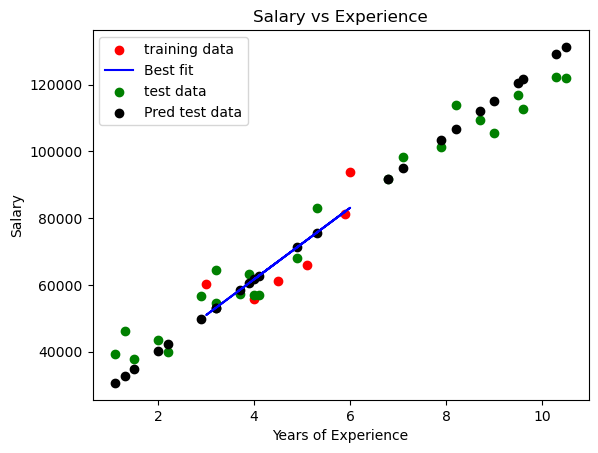

our model is 95.17% accurate
Now you can predict salary of an employee using our model

Enter experience in years of the candidates, seperated by comma
2,5,10,1


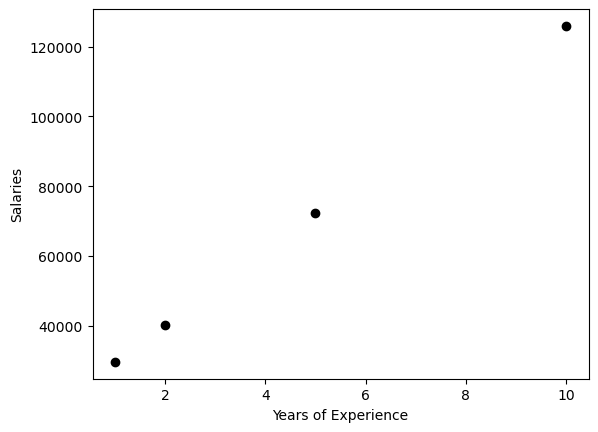

   Experience       Salaries
0         2.0   40273.162559
1         5.0   72409.167040
2        10.0  125969.174508
3         1.0   29561.161065


In [ ]:
def main():
    welcome()
    try:
        csv_files = checkcsv()
        if csv_files == "No csv files in the directory":
            raise FileNotFoundError("No csv files in the directory")
        csv_files = display_and_select_csv(csv_files)
        print(csv_files, "is selected")
        print("Reading csv file")
        print("Creating Dataset")
        dataset = pd.read_csv(csv_files)
        print("Dataset Created")
        X = dataset.iloc[:,:-1].values
        Y = dataset.iloc[:,-1].values
        s = float(input("Enter test data size (between 0 to 1)"))
        X_train,X_test,Y_train, Y_test = train_test_split(X, Y, test_size=s)
        print("Model created in progression")
        regressionObject = LinearRegression()
        regressionObject.fit(X_train, Y_train)
        print("Model is created")
        print("Press ENTER key to predict test data in trained model")
        input()
        
        
        
        Y_pred = regressionObject.predict(X_test)
        i = 0 #
        print(X_test, "  ...", Y_test, "  ...", Y_pred)#Printing test data, actual salaries, and predicted salaries
        while i<len(X_test): ##Loop for picking individual test data
            print(X_test[i], "...", Y_test[i], "...", Y_pred[i])#Printing individual test data, actual salaries, and predicted salaries
            i+=1 #Moves to the next test data point
        print("press ENTER key to see above graphical format")# Printing instruction for the user to press ENTER to view result
        input()#Press enter button for going to the next step
        graph(X_train, Y_train, regressionObject, X_test, Y_test, Y_pred)#Call the graph function to plot the results
        r2 = r2_score(Y_test, Y_pred)# Calculate the R^2 score for the model

        print("our model is %2.2f%% accurate" %(r2*100))# Printing the accuracy of the model
        print("Now you can predict salary of an employee using our model")#Inform the user that they can now predict salaries
        print("\nEnter experience in years of the candidates, seperated by comma")# Printing instruction for the user to enter experience years to get the salary prediction
            
            
        exp = [float(e) for e in input().split(",")]# Reading experience years from user input and convert to a list of floats
        ex = []# Initializing an empty list to hold experience values
        for x in exp: # Looping over the list of experience years
            ex.append([x])# Append each experience year as a list to the 'ex' list
        experience = np.array(ex)# Converting the 'ex' list to a numpy array
        salaries = regressionObject.predict(experience)# Predicting salaries for the given experience years

            
        plt.scatter(experience, salaries, color="black")  # Plotting the predicted salaries against experience years
        plt.xlabel("Years of Experience")  # Setting the label for the x-axis
        plt.ylabel("Salaries")  # Setting the label for the y-axis
        plt.show()  # Displaying the plot
            
        
        d = pd.DataFrame({"Experience": exp, "Salaries": salaries})  # Creating a DataFrame with experience and predicted salaries
        print(d)  # Printing the DataFrame
            
    except FileNotFoundError:
        print("No csv file in the directory")
        print("Press ENTER key to exit")# Instruction for the user to press ENTER to exit
        input()# Wait for the user to press ENTER
        exit()# Exit the program
            
if __name__ == "__main__":
    main()
    input()

